# FDW Crop Production Data Analysis - Madagascar

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

## Show data points per "publication_name" and "stats"

In [2]:
import json, requests
import pandas as pd
host = 'https://fdw.fews.net'
auth = tuple(json.loads(open('token.json', "r").read()))
parameters = {
    'format': 'json',
    'country': 'Madagascar',
    'product': 'R011',
    'survey_type': 'crop:best'
}
endpoint = '/api/cropproductionindicatorvalue/'
response = requests.get(host + endpoint, auth=auth, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
df.pivot_table(
    index=['source_document','publication_name'], 
    columns=['status','collection_status'],
    values='value',
    aggfunc='count'
)

status                                                                                             Collected  \
collection_status                                                                                  Published   
source_document                                 publication_name                                               
Annuaire des Statistiques Agricoles, Madagascar Annuaire des Statistiques Agricoles, 1993, Mada...    2385.0   
                                                Annuaire des Statistiques Agricoles, 1995, 1996...    2400.0   
                                                Annuaire des Statistiques Agricoles, 1998-2001,...    2407.0   
                                                Annuaire des Statistiques Agricoles, 2001-2004,...     403.0   
                                                Annuaire des Statistiques Agricoles, 2003, Mada...     715.0   
                                                Annuaire des Statistiques Agricoles, 2005-2008,...    2484.0   
                                                Annuaire des Statistiques Agricoles, 2007-2010,...    1242.0   
                                                Official Spreadsheet, 2017, Madagascar                 306.0   
FEWS NET Agro Maps, Madagascar                  FEWS AgroMaps, 2005, Madagascar                         98.0   
Official agricultural statistics, Madagascar    Official Spreadsheet, 2012-2020, Madagascar            264.0   
                                                Official Spreadsheet, 2016-2017, Madagascar            132.0   

status                                                                                             Not Collected  
collection_status                                                                                      Published  
source_document                                 publication_name                                                  
Annuaire des Statistiques Agricoles, Madagascar Annuaire des Statistiques Agricoles, 1993, Mada...           NaN  
                                                Annuaire des Statistiques Agricoles, 1995, 1996...           NaN  
                                                Annuaire des Statistiques Agricoles, 1998-2001,...           0.0  
                                                Annuaire des Statistiques Agricoles, 2001-2004,...           0.0  
                                                Annuaire des Statistiques Agricoles, 2003, Mada...           0.0  
                                                Annuaire des Statistiques Agricoles, 2005-2008,...           NaN  
                                                Annuaire des Statistiques Agricoles, 2007-2010,...           NaN  
                                                Official Spreadsheet, 2017, Madagascar                       NaN  
FEWS NET Agro Maps, Madagascar                  FEWS AgroMaps, 2005, Madagascar                              0.0  
Official agricultural statistics, Madagascar    Official Spreadsheet, 2012-2020, Madagascar                  0.0  
                                                Official Spreadsheet, 2016-2017, Madagascar                  0.0

## Report 1: Year-off issue

In [3]:
import json, requests
import pandas as pd
host = 'https://fdw.fews.net'
auth = tuple(json.loads(open('token.json', "r").read()))
parameters = {
    'format': 'json',
    'country': 'Madagascar',
    'product': 'R011',
    'survey_type': 'crop:best'
}
endpoint = '/api/cropproductionindicatorvalue/'
response = requests.get(host + endpoint, auth=auth, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
df[
    (df['product'] == 'Maize (Corn)') &
    (df['indicator'] == 'Quantity Produced')
].pivot_table(index='period_date', columns='fnid', values='value').sum(axis=1).tail(10)

period_date
2011-03-31    446729.000000
2013-03-31    447947.961868
2014-03-31    379246.096558
2015-03-31    364128.272258
2016-03-31    329366.556790
2017-03-31    316331.438744
2018-03-31    281487.468508
2019-03-31    215000.547016
2020-03-31    219220.476429
2021-03-31    224883.087739
dtype: float64

## Report 2: Missing records

In [4]:
import json, requests
import pandas as pd
host = 'https://fdw.fews.net'
auth = tuple(json.loads(open('token.json', "r").read()))
parameters = {
    'format': 'json',
    'country': 'Madagascar',
    'product': 'R011',
    'survey_type': 'crop:best'
}
endpoint = '/api/cropproductionindicatorvalue/'
response = requests.get(host + endpoint, auth=auth, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
df[
    (df['product'] == 'Maize (Corn)')
].pivot_table(index='period_date', columns='indicator', values='value', aggfunc='count')

indicator,Area Harvested,Area Planted,Quantity Produced,Yield
period_date,,,,
1991-03-31,NaN,98.0,98.0,98.0
1992-03-31,NaN,98.0,98.0,98.0
1993-03-31,NaN,98.0,98.0,98.0
1994-03-31,NaN,98.0,98.0,98.0
1995-03-31,NaN,100.0,100.0,100.0
1996-03-31,NaN,100.0,100.0,100.0
1997-03-31,NaN,100.0,100.0,100.0
1998-03-31,NaN,100.0,100.0,100.0
1999-03-31,NaN,100.0,100.0,100.0


## Validation with FAO-STAT

<Axes: xlabel='year'>

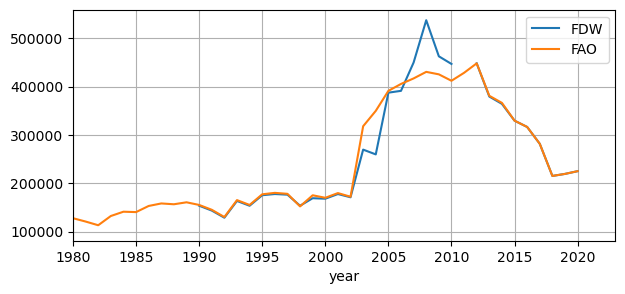

In [2]:
#%% Validation with FAO-STAT national production data
# Load GSCD crop data -------------------------------- #
# country_iso, country_name, product_name_fdw, product_name_fao = 'MG', 'Madagascar', 'Rice', 'Rice'
country_iso, country_name, product_name_fdw, product_name_fao = 'MG', 'Madagascar', 'Maize', 'Maize (corn)'
df = pd.read_hdf('../data/crop/adm_crop_production_%s.hdf' % country_iso)
df = df[df['gscd_code']=='calibrated']; fnids = list(df['fnid'].unique())
df = df[
    (df['product'] == product_name_fdw) &
    (df['indicator'] == 'production')
]
df['year'] = df['harvest_year']
data_fdw = df.pivot_table(index='year',columns='product',values='value',aggfunc='sum').sum(1).rename('FDW')
# ---------------------------------------------------- #

# Load FAO-STAT National Production Data ------------- #
df = pd.read_csv('../data/crop/adm_fao_stat.csv', index_col=0)
data_fao = df[
    (df['cnt_name'] == country_name) &
    (df['cpc2_name'] == product_name_fao) &
    (df['indicator'] == 'Production')
].set_index('year')['value']
# ---------------------------------------------------- #
data = pd.concat([data_fdw, data_fao], axis=1, keys=['FDW','FAO']).sort_index()
data.plot(xlim=[1980,2023],figsize=[7,3],grid=True)

In [3]:
data

,FDW,FAO
year,,
1961,NaN,116920.0
1962,NaN,102700.0
1963,NaN,108300.0
1964,NaN,133480.0
1965,NaN,122555.0
1966,NaN,140895.0
1967,NaN,145515.0
1968,NaN,140890.0
1969,NaN,142985.0


## Validation with CHIRPS Precipitation

Annual-Rice Correlation:
           FDW      PRCP
FDW   1.000000  0.106428
PRCP  0.106428  1.000000


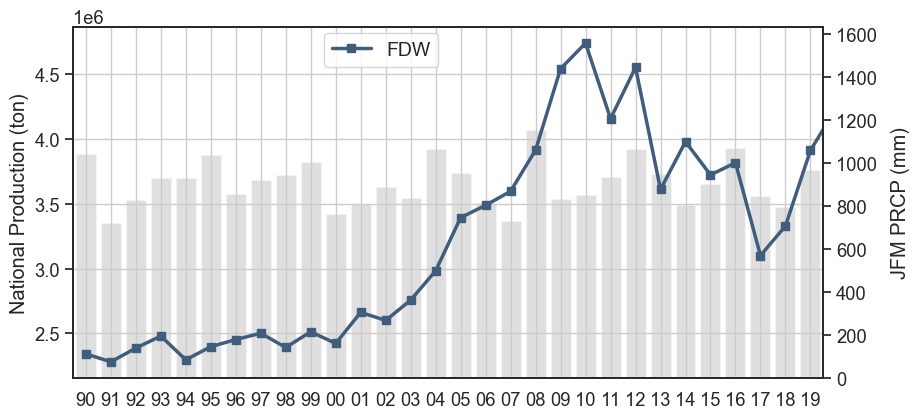

In [7]:
#%% Correlation with growing season CHIRPS precipitation
# Load GSCD crop data -------------------------------- #
country_iso, country_name = 'MG', 'Madagascar'
df = pd.read_hdf('../data/crop/adm_crop_production_%s.hdf' % country_iso)
df = df[df['gscd_code']=='calibrated']; fnids = list(df['fnid'].unique())
season_name, product_name, prcp_start_month, prcp_season_name = 'Annual', 'Rice', 1, 'JFM PRCP (mm)'
df = df[
    (df['season_name'] == season_name) &
    (df['product'].isin([product_name])) &
    (df['indicator'] == 'production')
]
df['year'] = df['harvest_year']
data = df.pivot_table(index='year',columns='product',values='value',aggfunc='sum').sum(1).rename('FDW')
# ---------------------------------------------------- #

# Load precipitation --------------------------------- #
prcp = pd.read_hdf('../data/adm.prcp.chirps-v2.crop.extended.hdf')[fnids]
# prcp.index = pd.to_datetime(prcp.index)
prcp = prcp.resample('1M').agg('sum')
prcp.index = prcp.index.map(lambda x: x.replace(day=1))
assert prcp.isna().sum().sum() == 0 # if not, use FillMissMonthMean
# National seasonal precipitation
prcp_nat = prcp.mean(1).rename('PRCP')
# Forward rolling summation
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=3)   # Forward Rolling Window
prcp_nat = prcp_nat.rolling(window=indexer, min_periods=3).sum()
prcp_nat = prcp_nat[prcp_nat.index.month == prcp_start_month]                      # Start month
prcp_nat = prcp_nat.groupby(prcp_nat.index.year).sum()
prcp_label = prcp_season_name
# Correlations
corr_value = pd.concat([data,prcp_nat],axis=1).corr()
print(f'{season_name}-{product_name} Correlation:\n{corr_value}')
# ---------------------------------------------------- #

# Validation figure ---------------------------------- #
years = np.arange(1990,2020)
sns.set(style="white", font_scale=1.2)
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(9,4))
data.plot(ax=ax1, legend=None, linewidth=2.5, marker='s', color=['#405E7B','#FB6222','#17AB6F'])
ax1.set_xlim([years.min()-0.5, years.max()+0.5])
ax1.set_xticks(years)
ax1.set_xticklabels(['%02d'% yr for yr in np.mod(years,100)])
ax1.xaxis.grid(True)
ax1.grid(True)
ax1.set_xlabel('')
ax1.set_ylabel('National Production (ton)')
year, value = prcp_nat.index+1, prcp_nat.values
ax2 = ax1.twinx()
plt.bar(year, value, alpha=.25, color='grey')
ax2.set_ylim([0, value.max()*1.3])
ax2.set_ylabel(prcp_label, labelpad=10)
ax1.set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2
ax1.legend(bbox_to_anchor=(0.5, 1.01), columnspacing=0.7, ncol=3, fontsize=14)
plt.tight_layout(pad=0)
plt.show()
# ---------------------------------------------------- #